In [33]:
from path import Path
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from matplotlib import pyplot as plt
import numpy as np

In [2]:
data1 = Path('../Room_Occupancy_Project/Resources/Kaggle_Room_Estimation/Dataset/Occupancy_Estimation.csv')
df1 = pd.read_csv(data1)
df1.head()

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1


In [3]:
data2 = Path('../Room_Occupancy_Project/Resources/Kaggle_Room_Occupancy/Dataset/file.csv')
df2 = pd.read_csv(data2)
df2.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,23.7000,26.272,585.200000,749.200000,0.004764,1
1,23.7180,26.290,578.400000,760.400000,0.004773,1
2,23.7300,26.230,572.666667,769.666667,0.004765,1
3,23.7225,26.125,493.750000,774.750000,0.004744,1
4,23.7540,26.200,488.600000,779.000000,0.004767,1


In [4]:
data3 = Path('../Room_Occupancy_Project/Resources/Kaggle_Room_Occupancy_Detection/Dataset/Occupancy.csv')
df3 = pd.read_csv(data3)
df3.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1
1,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1
2,2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1
3,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1
4,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1


In [5]:
#convert occupancy 0 1 2 3 to 0 for not occupied 1 for occupied 123
df1.loc[df1['Room_Occupancy_Count'] > 0, ['Room_Occupancy_Count']] = 1
df1.head()

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1


In [6]:
df1["Room_Occupancy_Count"].value_counts()

0    8228
1    1901
Name: Room_Occupancy_Count, dtype: int64

In [7]:
#change room occupancy count to occupancy in Data 1

df1.rename(columns={'Room_Occupancy_Count':'Occupancy'}, inplace=True)
df1.head()

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Occupancy
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1


## Create function to perform Random Forest Analysis

In [42]:
# Create Function to Automate Random Forest Model

def occupancy_forest(df):
    
    # Remove Object Types from Dataset
    df_objects = df.dtypes[df.dtypes == "object"].index.tolist()
    df_clean = df.drop(df_objects, axis=1)
    
    # Define Features Set
    X = df_clean.copy()
    X = X.drop("Occupancy", axis=1)
    
    # Define the Target Vector
    y = df_clean["Occupancy"].values.ravel()
    
    # Splitting into Train and Test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)
    
    # Creating StandardScaler instance
    scaler = StandardScaler()
    
    # Fitting Standard Scaller
    X_scaler = scaler.fit(X_train)
    
    # Scaling data
    X_train_scaled = X_scaler.transform(X_train)
    X_test_scaled = X_scaler.transform(X_test)
    
    # Creating the decision tree classifier instance
    rf_model = RandomForestClassifier(n_estimators=128, random_state=78)
    
    # Fitting the model
    rf_model = rf_model.fit(X_train_scaled, y_train)
    
    # Making predictions using the testing data
    predictions = rf_model.predict(X_test_scaled)
    
    # Calculating the confusion matrix
    cm = confusion_matrix(y_test, predictions)
    cm_df = pd.DataFrame(cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])
    
    # Calculating the accuracy score
    acc_score = accuracy_score(y_test, predictions)
    
    # Displaying results
    print("Confusion Matrix")
    display(cm_df)
    print(f"Accuracy Score : {acc_score}")
    print("Classification Report")
    print(classification_report(y_test, predictions))
    
    # print(rf_model.feature_importances_)
    feature_names = X.columns
    importances = rf_model.feature_importances_
    forest_importances = pd.Series(importances, index=feature_names)
    forest_importances.sort_values(ascending=False,inplace=True)
    fig, ax = plt.subplots()
    forest_importances.plot.bar(ax=ax)
    ax.set_title("Feature importances using MDI")
    ax.set_ylabel("Mean decrease in impurity")
    fig.tight_layout()

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,2023,0
Actual 1,2,508


Accuracy Score : 0.9992104224240032
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2023
           1       1.00      1.00      1.00       510

    accuracy                           1.00      2533
   macro avg       1.00      1.00      1.00      2533
weighted avg       1.00      1.00      1.00      2533



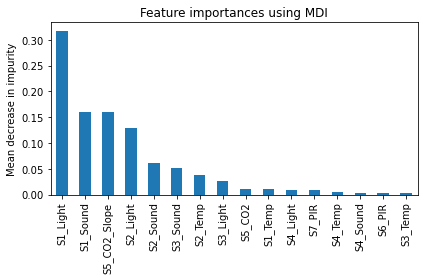

In [43]:
occupancy_forest(df1)

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,412,6
Actual 1,1,248


Accuracy Score : 0.9895052473763118
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       418
           1       0.98      1.00      0.99       249

    accuracy                           0.99       667
   macro avg       0.99      0.99      0.99       667
weighted avg       0.99      0.99      0.99       667



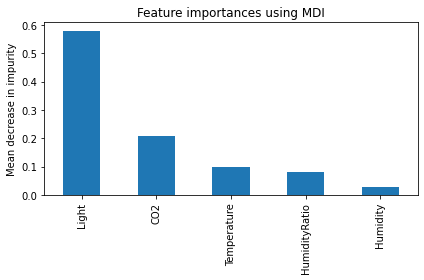

In [44]:
occupancy_forest(df2)

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,3924,23
Actual 1,11,1182


Accuracy Score : 0.9933852140077821
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      3947
           1       0.98      0.99      0.99      1193

    accuracy                           0.99      5140
   macro avg       0.99      0.99      0.99      5140
weighted avg       0.99      0.99      0.99      5140



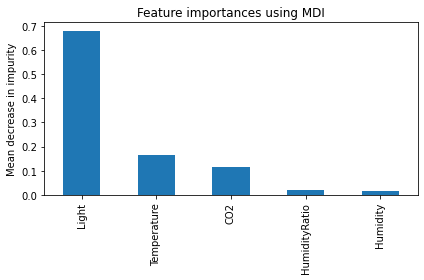

In [45]:
occupancy_forest(df3)